In [2]:
# Import Libraries
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet
from neuralprophet import set_random_seed
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly.offline as pyoff
import plotly.graph_objs as go

In [ ]:
# Import CSV File
df = pd.read_csv('CHANGE-THIS')
df.drop('store', axis=1, inplace=True)
df.drop('item', axis=1, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df

In [ ]:
df_day = pd.read_csv('CHANGE-THIS')
df_day['ds'] = pd.to_datetime(df_day['ds'])
df_day.dropna()
df_day

In [ ]:
# Create Data Frame Based On EveryDay
df_day= df.groupby(df['date'].dt.date).sum().reset_index()
df_day['date'] = pd.to_datetime(df_day['date'])
df_day.columns = ['ds','y']
#df_day.to_csv('df_day.csv', index = False)
df_day

In [ ]:
# Convert Previous Data Frame To EveryMonth
df_month = df_day.groupby([df_day['ds'].dt.year.rename('year'),df_day['ds'].dt.month.rename('month')]).sum().reset_index()
df_month['ds'] = pd.to_datetime(df_month['year'].astype(str) + df_month['month'].astype(str), format='%Y%m')
df_month.drop('year', axis=1, inplace=True)
df_month.drop('month', axis=1, inplace=True)
df_month = df_month[["ds", "y"]]
df_month

In [23]:
# Plotly DF Before Train
plot_data = [
    go.Scatter(
        x=df_day['ds'],
        y=df_day['y'],
    )
]

plot_layout = go.Layout(
        title='Sales'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [33]:
# Use NeuralProphet For Training
m = NeuralProphet(epochs=256)
df_train, df_val = m.split_df(df_day, freq='D', valid_p=0.2)
metrics = m.fit(df_day, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.796% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.796% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


  0%|          | 0/119 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.06E-01, min: 7.32E-01


  0%|          | 0/119 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.26E-01, min: 2.10E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.10E-01
Epoch[256/256]: 100%|██████████| 256/256 [00:09<00:00, 26.82it/s, SmoothL1Loss=0.00662, MAE=3e+3, RMSE=3.65e+3, RegLoss=0]   


In [34]:
test_metrics = m.test(df_val)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.98% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss      MAE     RMSE
1         0.004 2353.267 2811.617


In [35]:
df_train

,ds,y
0,2021-01-01,29374.15234
1,2021-01-02,32127.26758
2,2021-01-03,32782.02344
3,2021-01-04,31971.91406
4,2021-01-05,33992.42969
...,...,...
388,2022-01-24,36654.32813
389,2022-01-25,36954.00391
390,2022-01-26,36852.12109
391,2022-01-27,37138.23438


In [36]:
df_val

,ds,y
0,2022-01-29,38138.17969
1,2022-01-30,37917.60156
2,2022-01-31,38483.12500
3,2022-02-01,38743.27344
4,2022-02-02,36952.98438
...,...,...
93,2022-05-02,38529.32813
94,2022-05-03,37750.45313
95,2022-05-04,39698.37109
96,2022-05-05,36575.14063


In [37]:
# Forecast into the unknown future
future = m.make_future_dataframe(df_train, periods=365, n_historic_predictions=True)
forecast = m.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.746% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.868% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.868% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


In [38]:
future

,ds,y
0,2021-01-01,29374.15234
1,2021-01-02,32127.26758
2,2021-01-03,32782.02344
3,2021-01-04,31971.91406
4,2021-01-05,33992.42969
...,...,...
753,2023-01-24,NaN
754,2023-01-25,NaN
755,2023-01-26,NaN
756,2023-01-27,NaN


In [39]:
forecast

,ds,y,yhat1,residual1,trend,season_weekly
0,2021-01-01,29374.15234,31545.236328,2171.083988,31715.937500,-170.701920
1,2021-01-02,32127.26758,31927.318359,-199.949221,31996.402344,-69.083450
2,2021-01-03,32782.02344,32320.160156,-461.863284,32276.867188,43.293346
3,2021-01-04,31971.91406,32638.482422,666.568362,32557.330078,81.151772
4,2021-01-05,33992.42969,32886.871094,-1105.558596,32837.792969,49.076790
...,...,...,...,...,...,...
753,2023-01-24,NaN,44008.035156,NaN,43958.957031,49.076790
754,2023-01-25,NaN,44187.828125,NaN,43968.968750,218.857910
755,2023-01-26,NaN,43826.382812,NaN,43978.976562,-152.594467
756,2023-01-27,NaN,43818.289062,NaN,43988.988281,-170.701920


In [40]:
# Mean Absolute Percentage Error (MAPE)
start_day = pd.to_datetime(df_val['ds'][0].strftime("%Y-%m-%d"))
end_day = pd.to_datetime(df_val['ds'][len(df_val['ds'])-1].strftime("%Y-%m-%d"))
predicted_val = forecast[forecast['ds'].between(start_day, end_day)]['yhat1']

mape = np.mean(np.abs((df_val['y'] - predicted_val.values) / df_val['y'])) * 100
mape

5.666316400475624

In [41]:
#fig_forecast = m.plot(forecast)
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat1'],
                    mode='lines',
                    name='Forecast'))
fig.add_trace(go.Scatter(x=df_val['ds'], y=df_val['y'],
                    mode='markers',
                    name='Actual',
                    marker=dict(
                        color='black',
                        size=4
                    )))


fig.show()

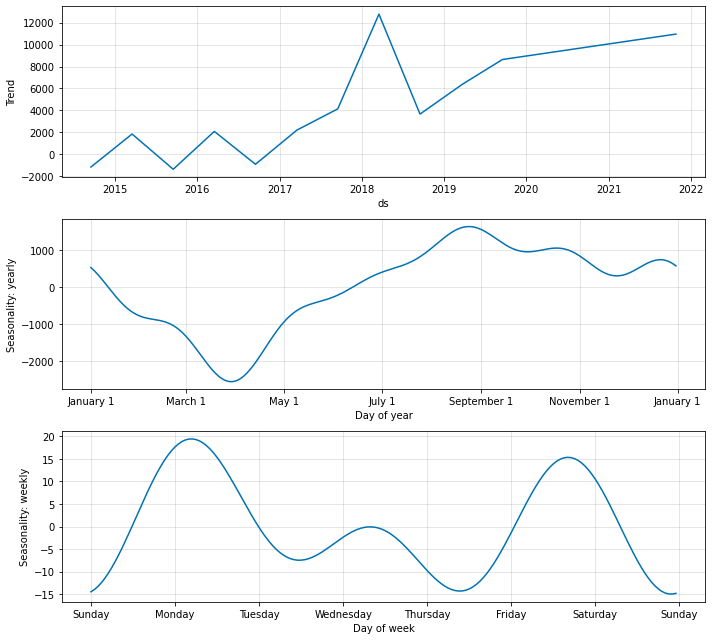

In [17]:
plot2 = m.plot_components(forecast)